### Eigenvectors-based method

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font_scale=1.6)

In [3]:
n = 12

In [4]:
x_0 = np.zeros(n)
x_0[0] = 1
x_0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
#for the element 1
Lambda2_1_1=7; Mu1_2_1=100;
#for the element 2
Lambda2_1_2=10; Mu1_2_2=80;
#for the element 3
Lambda3_2_3=10; Lambda3_1_3=0; Lambda2_1_3=7;
Mu1_3_3=0; Mu1_2_3=120; Mu2_3_3=110

In [6]:
A = np.zeros((n, n))

In [7]:
A[0, 0] = -(Lambda2_1_1+Lambda2_1_2+Lambda3_2_3)
A[0, 1] = Lambda2_1_1
A[0, 2] = Lambda2_1_2
A[0, 3] = Lambda3_2_3

A[1, 0] = Mu1_2_1
A[1, 1] = -(Mu1_2_1+Lambda2_1_2+Lambda3_2_3)
A[1, 4] = Lambda2_1_2
A[1, 5] = Lambda3_2_3

A[2, 0] = Mu1_2_2
A[2, 2] = -(Mu1_2_2+Lambda2_1_1+Lambda3_2_3)
A[2, 4] = Lambda2_1_1
A[2, 6] = Lambda3_2_3

A[3, 0] = Mu2_3_3
A[3, 3] = -(Mu2_3_3+Lambda2_1_1+Lambda2_1_2+Lambda2_1_3)
A[3, 5] = Lambda2_1_1
A[3, 6] = Lambda2_1_2
A[3, 7] = Lambda2_1_3

A[4, 1] = Mu1_2_2
A[4, 2] = Mu1_2_1
A[4, 4] = -(Mu1_2_2+Mu1_2_1+Lambda3_2_3)
A[4, 8] = Lambda3_2_3

A[5, 1] = Mu2_3_3
A[5, 3] = Mu1_2_1
A[5, 5] = -(Mu2_3_3+Mu1_2_1+Lambda2_1_2+Lambda2_1_3)
A[5, 8] = Lambda2_1_2
A[5, 9] = Lambda2_1_3

A[6, 2] = Mu2_3_3
A[6, 3] = Mu1_2_2
A[6, 6] = -(Mu2_3_3+Mu1_2_2+Lambda2_1_1+Lambda2_1_3)
A[6, 8] = Lambda2_1_1
A[6, 10] = Lambda2_1_3

A[7, 3] = Mu1_2_3
A[7, 7] = -(Mu1_2_3+Lambda2_1_1+Lambda2_1_2)
A[7, 9] = Lambda2_1_1
A[7, 10] = Lambda2_1_2

A[8, 4] = Mu2_3_3
A[8, 5] = Mu1_2_2
A[8, 6] = Mu1_2_1
A[8, 8] = -(Mu2_3_3+Mu1_2_2+Mu1_2_1+Lambda2_1_3)
A[8, 11] = Lambda2_1_3

A[9, 5] = Mu1_2_3
A[9, 7] = Mu1_2_1
A[9, 9] = -(Mu1_2_3+Mu1_2_1+Lambda2_1_2)
A[9, 11] = Lambda2_1_2

A[10, 6] = Mu1_2_3
A[10, 7] = Mu1_2_2
A[10, 10] = -(Mu1_2_3+Mu1_2_2+Lambda2_1_1)
A[10, 11] = Lambda2_1_1

A[11, 8] = Mu1_2_3
A[11, 9] = Mu1_2_2
A[11, 10] = Mu1_2_1
A[11, 11] = -(Mu1_2_3+Mu1_2_2+Mu1_2_1)

In [8]:
def get_e_At(t, A):
    w, S = np.linalg.eig(A)
    S_inv = np.linalg.inv(S)
    
    exp_t = np.exp(t*w)
    M = np.diag(exp_t)
    
    exp_At = np.dot(np.dot(S, M), S_inv)
    
    return exp_At

In [9]:
lb  = 0.0
ub = 0.2
n_star = 500+1
x_star = np.linspace(lb, ub, n_star)[1:]

In [10]:
%%time 

val = []
for t in x_star:
    e_At = get_e_At(t, A)
    MSS_reliability = np.dot(x_0, e_At)
    
    val.append(MSS_reliability)

Wall time: 61.9 ms


In [11]:
exact_solution_eigen_vectors = np.array(val)
exact_solution_eigen_vectors_df = pd.DataFrame(val,  columns = ['state_1', 'state_2', 'state_3', 'state_4', 'state_5', 
                                                         'state_6', 'state_7', 'state_8', 'state_9', 'state_10',
                                                         'state_11', 'state_12'])

In [12]:
def get_system_performance(df):
    
    df['system_3.5'] = df['state_1']
    df['system_2.0'] = df['state_2']
    df['system_1.8'] = df['state_4'] + df['state_6']
    df['system_1.5'] = df['state_3'] + df['state_7']
    df['system_0'] = df['state_5'] + df['state_8'] + df['state_9'] + df['state_10'] + df['state_11'] + df['state_12']
    
    return df

In [13]:
exact_solution_eigen_vectors_df = get_system_performance(exact_solution_eigen_vectors_df)
exact_solution_eigen_vectors_df.to_csv("analytical_solution_by_eigenvector_method.csv", index=False)
exact_solution_eigen_vectors_df.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12,system_3.5,system_2.0,system_1.8,system_1.5,system_0
0,0.989461,0.002719,0.003903,0.003874,0.000011,0.000011,0.000015,0.000005,4.199986e-08,1.479473e-08,2.123212e-08,5.835563e-11,0.989461,0.002719,0.003885,0.003918,0.000016
1,0.979427,0.005285,0.007619,0.007508,0.000041,0.000041,0.000058,0.000021,3.151602e-07,1.117239e-07,1.610611e-07,8.690818e-10,0.979427,0.005285,0.007549,0.007677,0.000062
2,0.969868,0.007706,0.011159,0.010919,0.000089,0.000087,0.000126,0.000045,9.982098e-07,3.560873e-07,5.156228e-07,4.096992e-09,0.969868,0.007706,0.011006,0.011285,0.000135
3,0.960761,0.009993,0.014533,0.014121,0.000151,0.000147,0.000214,0.000077,2.221657e-06,7.974345e-07,1.159778e-06,1.206261e-08,0.960761,0.009993,0.014268,0.014747,0.000232
4,0.952080,0.012153,0.017751,0.017129,0.000227,0.000219,0.000319,0.000115,4.076314e-06,1.472082e-06,2.150250e-06,2.744632e-08,0.952080,0.012153,0.017347,0.018070,0.000350


Text(0, 0.5, 'Probability')

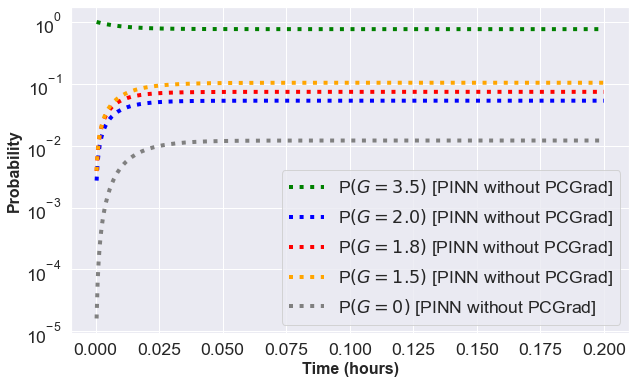

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors_df['system_3.5'], 
             label = r'P$\left(G=3.5 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'green', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors_df['system_2.0'], 
             label = r'P$\left(G=2.0 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'blue', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors_df['system_1.8'], 
             label = r'P$\left(G=1.8 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'red', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors_df['system_1.5'], 
             label = r'P$\left(G=1.5 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'orange', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_eigen_vectors_df['system_0'], 
             label = r'P$\left(G=0 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'gray', linestyle='dotted')

plt.yscale('log')
plt.xlabel("Time (hours)", fontdict=dict(weight='bold'), fontsize=16)
plt.ylabel("Probability", fontdict=dict(weight='bold'), fontsize=16)

### Laplace transform-based method

In [15]:
import sympy
from sympy import *
from sympy.matrices import Matrix, eye, zeros, ones, diag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
n = 12

In [17]:
A = zeros(n, n);

In [18]:
#for the element 1
Lambda2_1_1=7; Mu1_2_1=100;
#for the element 2
Lambda2_1_2=10; Mu1_2_2=80;
#for the element 3
Lambda3_2_3=10; Lambda2_1_3=7;
Mu1_2_3=120; Mu2_3_3=110

In [19]:
A[0, 0] = -(Lambda2_1_1+Lambda2_1_2+Lambda3_2_3)
A[0, 1] = Lambda2_1_1
A[0, 2] = Lambda2_1_2
A[0, 3] = Lambda3_2_3

A[1, 0] = Mu1_2_1
A[1, 1] = -(Mu1_2_1+Lambda2_1_2+Lambda3_2_3)
A[1, 4] = Lambda2_1_2
A[1, 5] = Lambda3_2_3

A[2, 0] = Mu1_2_2
A[2, 2] = -(Mu1_2_2+Lambda2_1_1+Lambda3_2_3)
A[2, 4] = Lambda2_1_1
A[2, 6] = Lambda3_2_3

A[3, 0] = Mu2_3_3
A[3, 3] = -(Mu2_3_3+Lambda2_1_1+Lambda2_1_2+Lambda2_1_3)
A[3, 5] = Lambda2_1_1
A[3, 6] = Lambda2_1_2
A[3, 7] = Lambda2_1_3

A[4, 1] = Mu1_2_2
A[4, 2] = Mu1_2_1
A[4, 4] = -(Mu1_2_2+Mu1_2_1+Lambda3_2_3)
A[4, 8] = Lambda3_2_3

A[5, 1] = Mu2_3_3
A[5, 3] = Mu1_2_1
A[5, 5] = -(Mu2_3_3+Mu1_2_1+Lambda2_1_2+Lambda2_1_3)
A[5, 8] = Lambda2_1_2
A[5, 9] = Lambda2_1_3

A[6, 2] = Mu2_3_3
A[6, 3] = Mu1_2_2
A[6, 6] = -(Mu2_3_3+Mu1_2_2+Lambda2_1_1+Lambda2_1_3)
A[6, 8] = Lambda2_1_1
A[6, 10] = Lambda2_1_3

A[7, 3] = Mu1_2_3
A[7, 7] = -(Mu1_2_3+Lambda2_1_1+Lambda2_1_2)
A[7, 9] = Lambda2_1_1
A[7, 10] = Lambda2_1_2

A[8, 4] = Mu2_3_3
A[8, 5] = Mu1_2_2
A[8, 6] = Mu1_2_1
A[8, 8] = -(Mu2_3_3+Mu1_2_2+Mu1_2_1+Lambda2_1_3)
A[8, 11] = Lambda2_1_3

A[9, 5] = Mu1_2_3
A[9, 7] = Mu1_2_1
A[9, 9] = -(Mu1_2_3+Mu1_2_1+Lambda2_1_2)
A[9, 11] = Lambda2_1_2

A[10, 6] = Mu1_2_3
A[10, 7] = Mu1_2_2
A[10, 10] = -(Mu1_2_3+Mu1_2_2+Lambda2_1_1)
A[10, 11] = Lambda2_1_1

A[11, 8] = Mu1_2_3
A[11, 9] = Mu1_2_2
A[11, 10] = Mu1_2_1
A[11, 11] = -(Mu1_2_3+Mu1_2_2+Mu1_2_1)

In [20]:
A

Matrix([
[-27,    7,  10,   10,    0,    0,    0,    0,    0,    0,    0,    0],
[100, -120,   0,    0,   10,   10,    0,    0,    0,    0,    0,    0],
[ 80,    0, -97,    0,    7,    0,   10,    0,    0,    0,    0,    0],
[110,    0,   0, -134,    0,    7,   10,    7,    0,    0,    0,    0],
[  0,   80, 100,    0, -190,    0,    0,    0,   10,    0,    0,    0],
[  0,  110,   0,  100,    0, -227,    0,    0,   10,    7,    0,    0],
[  0,    0, 110,   80,    0,    0, -204,    0,    7,    0,    7,    0],
[  0,    0,   0,  120,    0,    0,    0, -137,    0,    7,   10,    0],
[  0,    0,   0,    0,  110,   80,  100,    0, -297,    0,    0,    7],
[  0,    0,   0,    0,    0,  120,    0,  100,    0, -230,    0,   10],
[  0,    0,   0,    0,    0,    0,  120,   80,    0,    0, -207,    7],
[  0,    0,   0,    0,    0,    0,    0,    0,  120,   80,  100, -300]])

In [21]:
s = symbols('s')
t = symbols('t', positive=True)
s

s

In [22]:
I = eye(n)
I

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [23]:
%%time

F = sympy.integrals.transforms.inverse_laplace_transform((s*I - A).inv(), s, t)
F

Wall time: 7min 45s


Matrix([
[                                               (-277600*sqrt(3129)*exp(1035*t/2) + 45415200*exp(1035*t/2) - 34700*sqrt(3129)*exp(855*t/2) + 5676900*exp(855*t/2) - 19432*sqrt(3129)*exp(821*t/2) + 3179064*exp(821*t/2) - 2429*sqrt(3129)*exp(641*t/2) + 397383*exp(641*t/2) + 8260560*exp(t*(sqrt(3129)/2 + 444)) + 66084480*exp(t*(sqrt(3129)/2 + 534)) + 118008000*exp(t*(sqrt(3129)/2 + 551)) + 944064000*exp(t*(sqrt(3129)/2 + 641)) + 2429*sqrt(3129)*exp(t*(sqrt(3129) + 641/2)) + 397383*exp(t*(sqrt(3129) + 641/2)) + 19432*sqrt(3129)*exp(t*(sqrt(3129) + 821/2)) + 3179064*exp(t*(sqrt(3129) + 821/2)) + 34700*sqrt(3129)*exp(t*(sqrt(3129) + 855/2)) + 5676900*exp(t*(sqrt(3129) + 855/2)) + 277600*sqrt(3129)*exp(t*(sqrt(3129) + 1035/2)) + 45415200*exp(t*(sqrt(3129) + 1035/2)))*exp(-t*(sqrt(3129)/2 + 641))/1245754134,                                                                           7*(-2776*sqrt(3129)*exp(1035*t/2) + 454152*exp(1035*t/2) - 347*sqrt(3129)*exp(855*t/2) + 56769*exp(855*t/2

In [24]:
## for the element 1
Lambda2_1_1_val=7; Mu1_2_1_val=100;
## for the element 2
Lambda2_1_2_val=10; Mu1_2_2_val=80;
## for the element 3
Lambda3_2_3_val=10; Lambda2_1_3_val=7;
Mu1_2_3_val=120; Mu2_3_3_val=110

In [25]:
x_0 = np.zeros(n)
x_0[0] = 1

In [26]:
lb  = 0.0
ub = 0.2
n_star = 500+1
x_star = np.linspace(lb, ub, n_star)[1:]

In [27]:
%%time 

val = []
for t_val in x_star:
    state_transition_matrix = np.array(F.subs([(t, t_val)]))
    
    MSS_reliability = np.dot(x_0, state_transition_matrix)
    MSS_reliability = list(map(float, MSS_reliability))
    
    val.append(MSS_reliability)

Wall time: 3min 13s


In [28]:
exact_solution_Laplace = np.array(val)
exact_solution_Laplace_df = pd.DataFrame(val, columns = ['state_1', 'state_2', 'state_3', 'state_4', 'state_5', 
                                                         'state_6', 'state_7', 'state_8', 'state_9', 'state_10',
                                                         'state_11', 'state_12'])

In [29]:
def get_system_performance(df):
    
    df['system_3.5'] = df['state_1']
    df['system_2.0'] = df['state_2']
    df['system_1.8'] = df['state_4'] + df['state_6']
    df['system_1.5'] = df['state_3'] + df['state_7']
    df['system_0'] = df['state_5'] + df['state_8'] + df['state_9'] + df['state_10'] + df['state_11'] + df['state_12']
    
    return df

In [30]:
exact_solution_Laplace_df = get_system_performance(exact_solution_Laplace_df)
exact_solution_Laplace_df.to_csv("analytical_solution_by_laplace_method.csv", index=False)
exact_solution_Laplace_df.tail()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12,system_3.5,system_2.0,system_1.8,system_1.5,system_0
495,0.757825,0.053048,0.094728,0.068893,0.006631,0.004823,0.008612,0.004019,0.000603,0.000281,0.000502,0.000035,0.757825,0.053048,0.073716,0.10334,0.012071
496,0.757825,0.053048,0.094728,0.068893,0.006631,0.004823,0.008612,0.004019,0.000603,0.000281,0.000502,0.000035,0.757825,0.053048,0.073716,0.10334,0.012071
497,0.757825,0.053048,0.094728,0.068893,0.006631,0.004823,0.008612,0.004019,0.000603,0.000281,0.000502,0.000035,0.757825,0.053048,0.073716,0.10334,0.012071
498,0.757825,0.053048,0.094728,0.068893,0.006631,0.004823,0.008612,0.004019,0.000603,0.000281,0.000502,0.000035,0.757825,0.053048,0.073716,0.10334,0.012071
499,0.757825,0.053048,0.094728,0.068893,0.006631,0.004823,0.008612,0.004019,0.000603,0.000281,0.000502,0.000035,0.757825,0.053048,0.073716,0.10334,0.012071


Text(0, 0.5, 'Probability')

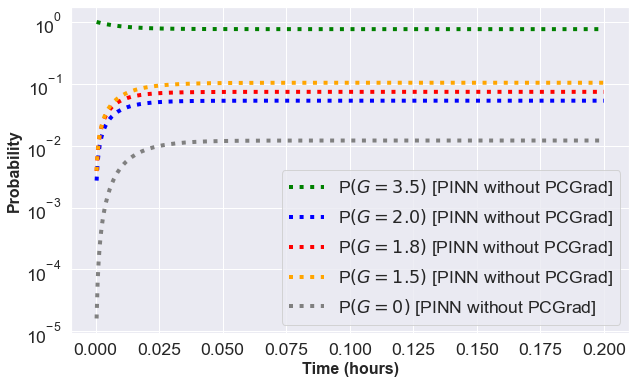

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace_df['system_3.5'], 
             label = r'P$\left(G=3.5 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'green', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace_df['system_2.0'], 
             label = r'P$\left(G=2.0 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'blue', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace_df['system_1.8'], 
             label = r'P$\left(G=1.8 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'red', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace_df['system_1.5'], 
             label = r'P$\left(G=1.5 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'orange', linestyle='dotted')
sns.lineplot(x = x_star.flatten(), y = exact_solution_Laplace_df['system_0'], 
             label = r'P$\left(G=0 \right)$ [PINN without PCGrad]', linewidth = 4, color = 'gray', linestyle='dotted')

plt.yscale('log')
plt.xlabel("Time (hours)", fontdict=dict(weight='bold'), fontsize=16)
plt.ylabel("Probability", fontdict=dict(weight='bold'), fontsize=16)